# Task 2: Exploratory Data Analysis

### Table of Contents

1. [Introduction](#introduction)
2. [Univariate Analysis](#univariate-analysis)
    * [Univariate Analysis Summary](#uni-analysis-summary)
3. [Bivariate Analysis](#bivariate-analysis)
    * [Bivariate Analysis Summary](#bi-analysis-summary)
4. [EDA Summary](#eda-summary)
5. [Data Cleaning](#data-cleaning)
6. [Saving](#saving)

## Introduction <a class="anchor" id="introduction"></a>

Exploratory data analysis (EDA) is performed on the Ames Housing training dataset, which has been cleaned during data wrangling. Both original training and testing sets have 79 columns describing the features of the homes, but training set has one additional column, which consists of the home prices. The explanation for each column can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). However, as the percentage of nulls in 5 columns were greater than 80% in the training set, these columns were dropped from the training set during data wrangling, and there are 75 remaining columns. The 5 columns are Alley, FireplaceQu, PoolQC, Fence and MiscFeature.

The purposes of carrying out EDA in this project are to further understand the data and to find insights in order to select the features that helpful in predicting house price. The steps for exploratory data analysis includes univariate and bivariate analysis. After EDA is completed, outliers, if there is any, will be removed from the dataset.

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')

In [2]:
# Define URLs of training sets
dirname = '/kaggle/input'
subdirname = 'dataset'
train_filename = 'train_clean_wrangling.csv'
train_filepath = os.path.join(dirname, subdirname, train_filename)

# Load training and testing sets
df = pd.read_csv(train_filepath)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,WdShing,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,WD,Normal,250000


In [3]:
print(len(df))

1460


In [4]:
# Print columns of data frame
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

- 75 variables (excld. ID)
- 34 numeric variables
    - 14 discrete variables (YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold)

    - 20 continuous variables (LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice)

- 41 categorical variables
    - 23 nominal variables (MSSubClass, MSZoning, Street, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, PavedDrive, SaleType, SaleCondition)

    - 18 ordinal variables (LotShape, LandContour, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, GarageFinish, GarageQual, GarageCond)

In [5]:
# Convert variables into ordered categorical types before plotting the distributions
ordinal_var_dict = {'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
                    'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'],
                    'LandSlope': ['Sev', 'Mod', 'Gtl'],
                    'OverallQual': list(range(0,11)),
                    'OverallCond': list(range(0,11)),
                    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'BsmtQual': ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'BsmtCond': ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'BsmtExposure': ['NoBsmt', 'No', 'Mn', 'Av', 'Gd'],
                    'BsmtFinType1': ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                    'BsmtFinType2': ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                    'GarageFinish': ['NoGarage', 'Unf', 'RFn', 'Fin'],
                    'GarageQual': ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'GarageCond': ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

## Univariate Analysis <a class="anchor" id="#univariate-analysis"></a>

As the main goal of this project is to determine house prices, the distribution of house price in training set will be plotted and studied.

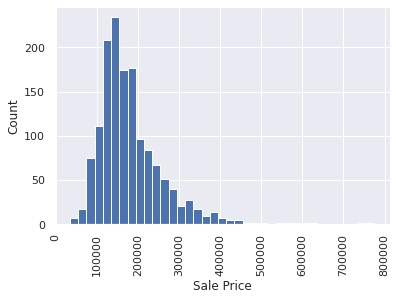

In [6]:
# Define bin size and bin intervals
binsize = 20000
bins = np.arange(df['SalePrice'].min(), df['SalePrice'].max()+binsize, binsize)

# Plot distribution of house price
plt.hist(df['SalePrice'], bins = bins);
plt.xlabel('Sale Price');
plt.xticks(rotation=90);
plt.ylabel('Count');

As the distribution is right-skewed, let's plot the distribution on a log-scale.

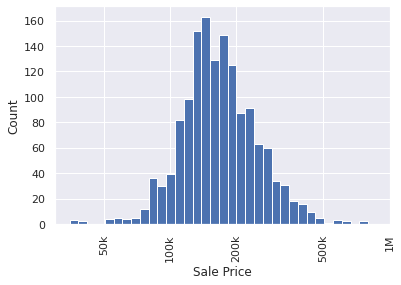

In [7]:
# Define bin size and bin intervals
log_binsize = 0.04
bins = 10 ** np.arange(np.log10(df['SalePrice'].min()), np.log10(df['SalePrice'].max())+log_binsize, log_binsize)

# Plot distribution of house price on a log-scale
plt.hist(df['SalePrice'], bins = bins);
plt.xscale('log')
plt.xlabel('Sale Price');
plt.xticks([5e4, 1e5, 2e5, 5e5, 1e6], ['50k', '100k', '200k', '500k', '1M'], rotation=90)
plt.ylabel('Count');

***Finding(s)***
> - The distribution of house price is right-skewed or positively skewed, with more houses having relatively lower prices, few having higher prices. When the distribution is plotted on a log-scale, the house price distribution looks normal, with the peak located at roughly between 150k and 200k.

Apart from the house prices, the distributions of other top variables that are thought to have a substantial influence on the house price will be plotted and studied. These variables are:

- LotArea, TotalBsmtSF, GrLivArea (*3 continous variables*)
- YearBuilt, YearRemodAdd, FullBath, HalfBath, BedroomAbvGr, GarageCars, YrSold (*7 discrete variables*)
- MSSubClass, Utilities, Neighborhood (*3 nominal variables*)
- OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, KitchenQual, Functional, GarageQual, GarageCond (*10 ordinal variables*)

### Continuous Variables
**LotArea**

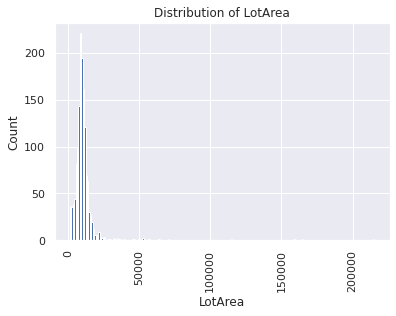

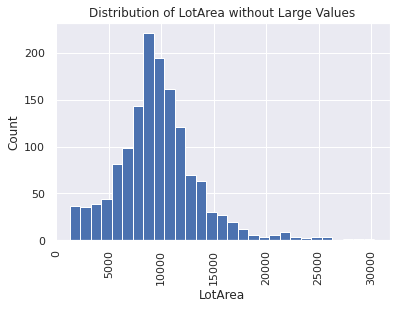

In [8]:
# Define bin size and bin intervals
binsize = 1000
bins = np.arange(df['LotArea'].min(), df['LotArea'].max()+binsize, binsize)

# Plot distribution of LotArea
plt.figure(0);
plt.hist(df['LotArea'], bins = bins);
plt.title('Distribution of LotArea');
plt.xlabel('LotArea');
plt.xticks(rotation=90);
plt.ylabel('Count');

# Plot distribution of LotArea without extremely large values

# Define bin size and bin intervals
max_value = 30000
bins = np.arange(df['LotArea'].min(), max_value+binsize, binsize)

# Plot distribution of LotArea
plt.figure(1);
plt.hist(df['LotArea'], bins = bins);
plt.title('Distribution of LotArea without Large Values');
plt.xlabel('LotArea');
plt.xticks(rotation=90);
plt.ylabel('Count');

***Finding(s)***
> - As shown in the first plot above, there are a few of the houses with extremely large lot size. When plotted without large lot size values, the distribution of lot size is slightly right-skewed as shown in the second plot above, with the peak located at roughly between 75k to 100k. As the large values might be outliers, they will be looked into further in bivariate analysis.

**TotalBsmtSF**

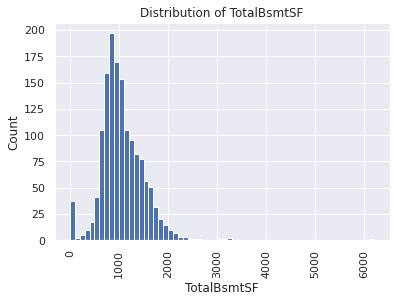

In [9]:
# Define bin size and bin intervals
binsize = 100
bins = np.arange(df['TotalBsmtSF'].min(), df['TotalBsmtSF'].max()+binsize, binsize)

# Plot distribution of TotalBsmtSF
plt.hist(df['TotalBsmtSF'], bins = bins);
plt.title('Distribution of TotalBsmtSF');
plt.xlabel('TotalBsmtSF');
plt.xticks(rotation=90);
plt.ylabel('Count');

***Finding(s)***
> - As shown in the plot above, there are a few of the houses with extremely large basement. The distribution of basement size is slightly right-skewed, with the peak located at roughly 1000. There are quite a number of houses without basement, which explains the huge spike at 0. As the large values might be outliers, they will be looked into further in bivariate analysis.

**GrLivArea**

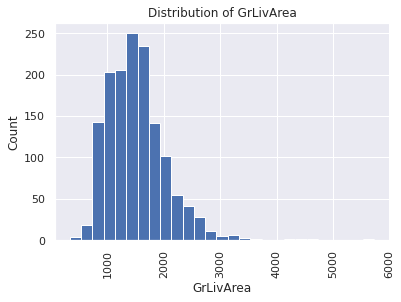

In [10]:
# Define bin size and bin intervals
binsize = 200
bins = np.arange(df['GrLivArea'].min(), df['GrLivArea'].max()+binsize, binsize)

# Plot histogram of GrLivArea
plt.hist(df['GrLivArea'], bins = bins);
plt.title('Distribution of GrLivArea');
plt.xlabel('GrLivArea');
plt.xticks(rotation=90);
plt.ylabel('Count');

***Finding(s)***
> - As shown in the plot above, there are a few of the houses with large living area. The distribution of living area is slightly right-skewed, with the peak located at roughly 1500. As the large values might be outliers, they will be looked into further in bivariate analysis.

### Discrete Variables

**YearBuilt, YearRemodAdd, YrSold**

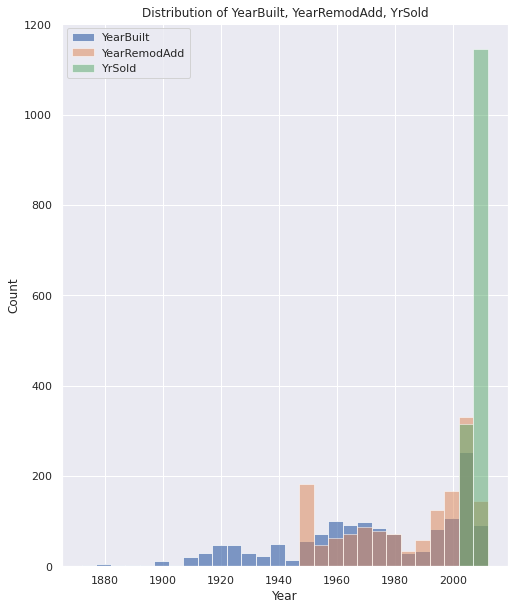

In [11]:
# Define bin size and bin intervals
binsize = 5
min_year = min(df['YearBuilt'].min(), df['YearRemodAdd'].min(), df['YrSold'].min())
max_year = max(df['YearBuilt'].max(), df['YearRemodAdd'].max(), df['YrSold'].max())
bins = np.arange(min_year, max_year+binsize, binsize)

# Plot distribution of YearBuilt, YearRemodAdd, YrSold
plt.figure(figsize=[8, 10])
plt.hist(df['YearBuilt'], bins=bins, alpha = 0.7);
plt.hist(df['YearRemodAdd'], bins=bins, alpha = 0.5);
plt.hist(df['YrSold'], bins=bins, alpha=0.5);
plt.title('Distribution of YearBuilt, YearRemodAdd, YrSold')
plt.xlabel('Year');
plt.ylabel('Count');
plt.legend(['YearBuilt', 'YearRemodAdd', 'YrSold']);

***Finding(s)***
> Based on the distribution shown in the plot above, the findings are:
- The distribution of YearBuilt is multimodal, which suggests that large housing development happened every few years.
- There is a small number of houses that are built at the end of the 19th century (around 1880), which is much earlier than most the houses in this dataset.
- The distribution of YearRemodAdd is bimodal (or multimodal), which suggests that remodellings were carried out every few years.
- The first huge spike (as indicated by the first orange bar) in the distribution of YearRemodAdd shows that many houses underwent remodelling somewhere around 1950. However, it is unclear why this is observed.
- All the houses are sold around the same time, which was in the 21st century.
- The distributions of YearBuilt and YearRemodAdd are multimodal, with the peaks and and troughs occuring around the same time. The distributions of YearBuilt and YearRemodAdd may be explained by economic cycle, where peaks correspond to economic booms and troughs correspond to economic recessions.

**FullBath and HalfBath**

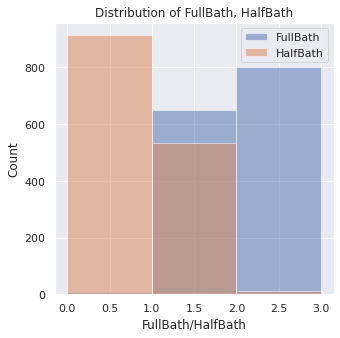

In [12]:
# Define bin size and bin intervals
binsize = 1
bins = np.arange(df['FullBath'].min(), df['FullBath'].max()+binsize, binsize)

# Plot distribution of FullBath and HalfBath
plt.figure(figsize=[5, 5])
plt.hist(df['FullBath'], bins=bins, alpha = 0.5);
plt.hist(df['HalfBath'], bins=bins, alpha = 0.5);
plt.title('Distribution of FullBath, HalfBath')
plt.xlabel('FullBath/HalfBath');
plt.ylabel('Count');
plt.legend(['FullBath', 'HalfBath']);

In [13]:
# Get number of houses without FullBath
len(df[df['FullBath'] == 0])

9

***Finding(s)***
> - Based on the distribution, almost all the houses have 1 or 2 FullBaths, with the exception of 9 houses. Most of the houses do not have HalfBath, and when they do, most of them have only 1 HalfBath. Lastyly, it is uncommon that a house has no FullBath or more than 1 HalfBath. 


**BedroomAbvGr**

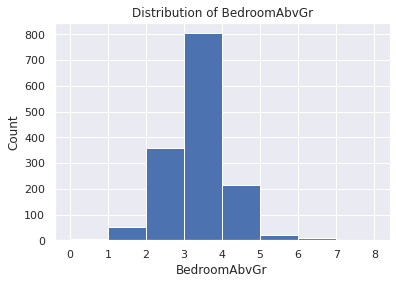

In [14]:
# Define bin size and bin intervals
binsize = 1
bins = np.arange(df['BedroomAbvGr'].min(), df['BedroomAbvGr'].max()+binsize, binsize)

# Plot distribution of BedroomAbvGr
plt.hist(df['BedroomAbvGr'], bins=bins);
plt.title('Distribution of BedroomAbvGr')
plt.xlabel('BedroomAbvGr');
plt.ylabel('Count');

***Finding(s)***
> - The distribution of BedroomAbvGr is slightly right-skewed, with the peak located at 3.


**GarageCars**

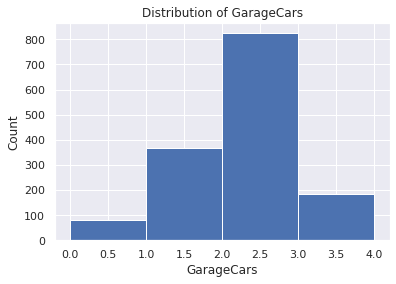

In [15]:
# Define bin size and bin intervals
binsize = 1
bins = np.arange(df['GarageCars'].min(), df['GarageCars'].max()+binsize, binsize)

# Plot distribution of BedroomAbvGr
plt.hist(df['GarageCars'], bins=bins);
plt.title('Distribution of GarageCars')
plt.xlabel('GarageCars');
plt.ylabel('Count');

***Finding(s)***
> - The distribution of GarageCars is slightly left-skewed, with the peak located at 2. Less than 100 houses do not have garage.

### Nominal Variables

**MSSubClass, Utilities, Neighborhood**

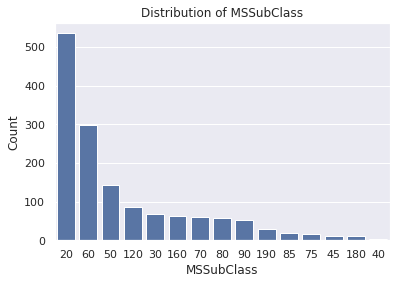

In [16]:
# Define color for countplot
default_color = sns.color_palette()[0]

# Plot distribution of MSSubClass
sns.countplot(df['MSSubClass'], order=df['MSSubClass'].value_counts().index, color=default_color);
plt.title('Distribution of MSSubClass');
plt.ylabel('Count');

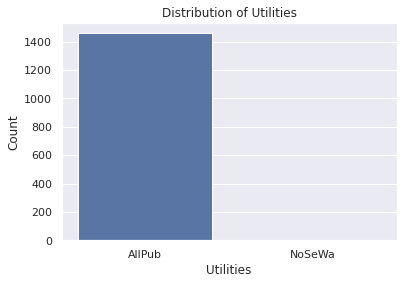

In [17]:
# Plot distribution of Utilities
sns.countplot(df['Utilities'], order=df['Utilities'].value_counts().index, color=default_color);
plt.title('Distribution of Utilities');
plt.ylabel('Count');

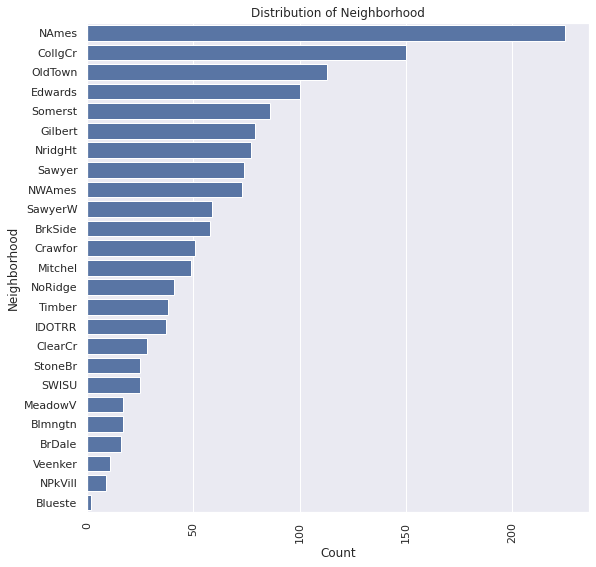

In [18]:
# Plot distribution of Neighborhood
plt.figure(figsize=[9,9])
sns.countplot(y=df['Neighborhood'], order=df['Neighborhood'].value_counts().index, color=default_color);
plt.title('Distribution of Neighborhood');
plt.xticks(rotation=90);
plt.xlabel('Count');

***Finding(s)***
> Based on the three plots above, the findings are:
- The most common MSSubClass is 20 (1-STORY 1946 & NEWER ALL STYLES), and the least common one is 40 (1-STORY W/FINISHED ATTIC ALL AGES).
- Almost all the houses have all the public utilities (AllPub), with the exception of several houses having electricity and gas only (NoSeWa). Thus, Utilities is very likely to have little to no influence on house price. This hypothesis will be verified in bivariate analysis.
- The most common Neighborhood is NAmes or North Ames, and the least common one is Blueste or Bluestem

### Ordinal Variables

**OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, GarageQual & GarageCond**

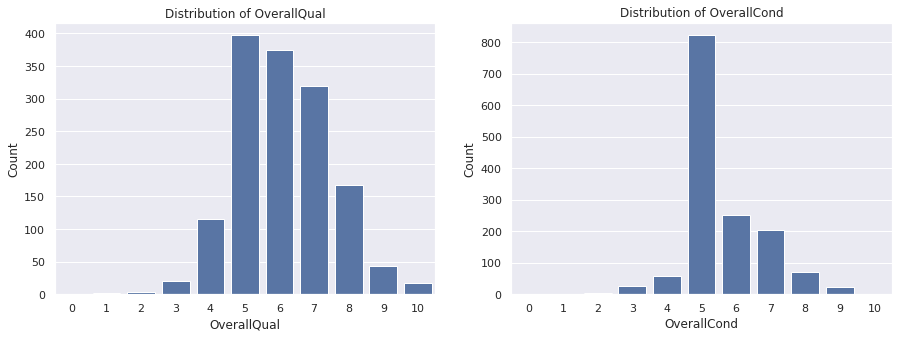

In [19]:
# Plot distribution of OverallQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['OverallQual'], color=default_color);
plt.title('Distribution of OverallQual');
plt.ylabel('Count');

# Plot distribution of OverallCond
plt.subplot(1,2,2)
sns.countplot(df['OverallCond'], color=default_color);
plt.title('Distribution of OverallCond');
plt.ylabel('Count');

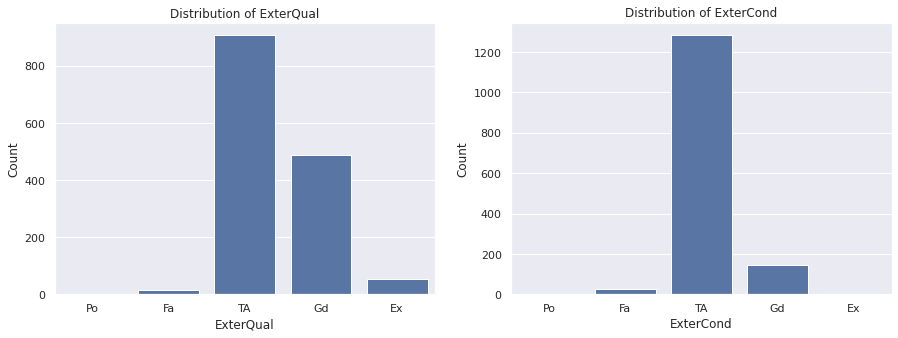

In [20]:
# Plot distribution of ExterQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['ExterQual'], color=default_color);
plt.title('Distribution of ExterQual');
plt.ylabel('Count');

# Plot distribution of ExterCond
plt.subplot(1,2,2)
sns.countplot(df['ExterCond'], color=default_color);
plt.title('Distribution of ExterCond');
plt.ylabel('Count');

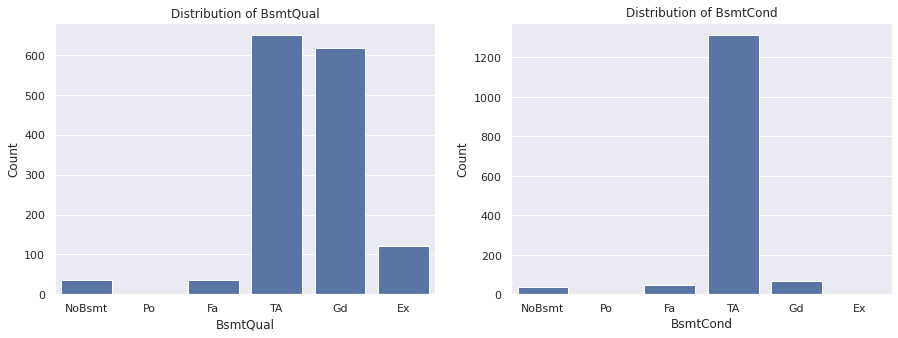

In [21]:
# Plot distribution of BsmtQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['BsmtQual'], color=default_color);
plt.title('Distribution of BsmtQual');
plt.ylabel('Count');

# Plot distribution of BsmtCond
plt.subplot(1,2,2)
sns.countplot(df['BsmtCond'], color=default_color);
plt.title('Distribution of BsmtCond');
plt.ylabel('Count');

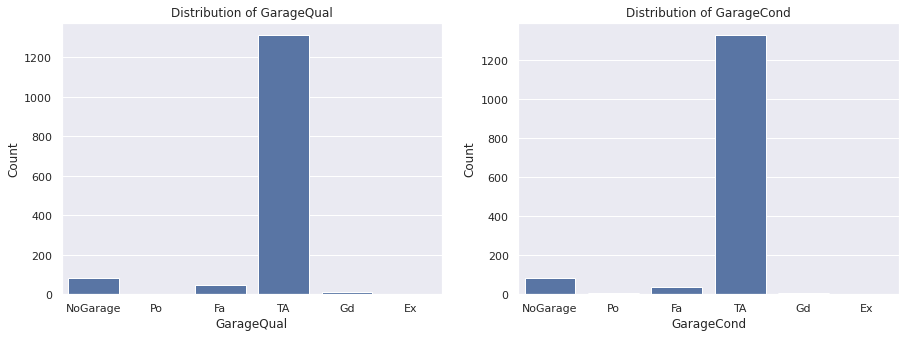

In [22]:
# Plot distribution of GarageQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['GarageQual'], color=default_color);
plt.title('Distribution of GarageQual');
plt.ylabel('Count');

# Plot distribution of GarageCond
plt.subplot(1,2,2)
sns.countplot(df['GarageCond'], color=default_color);
plt.title('Distribution of GarageCond');
plt.ylabel('Count');

***Finding(s)***
> Based on the plots above, the findings are:
- Both the distribution of OverallQual and Overall Cond are right-skewed. Most of the houses have average quality (OverallQual) and condition (OverallCond) as the ratings of quality and condition for most of the houses are 5.
- Most of the houses have average (TA) or better (Gd & Ex) external quality (ExterQual), external condition (ExterCond), basement quality (BsmtQuality), basement condition (BsmtCond), garage quality (GarageQual), garage condition (GarageCond).
- For most of the houses, the quality is better than the condition, apart from the garage.
- As almost all the houses have average(TA) ExterCond, BsmtCond, GarageQual and GarageCond, it is very likely that these variables will have little to no influences on house price. This hypothesis will be verified in bivariate analysis.

**KitchenQual & Functional**

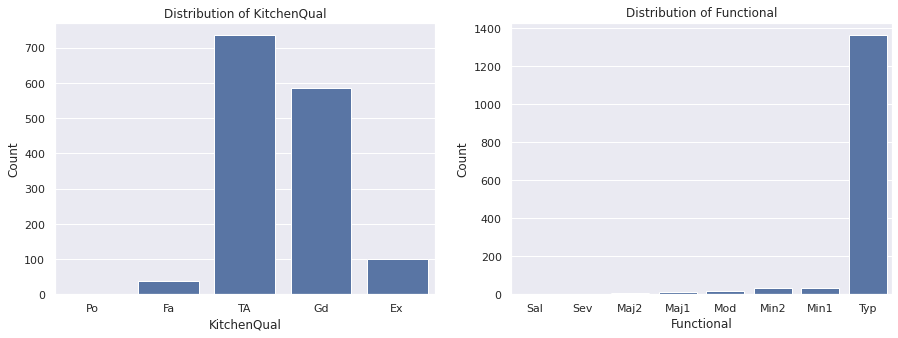

In [23]:
# Plot distribution of KitchenQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['KitchenQual'], color=default_color);
plt.title('Distribution of KitchenQual');
plt.ylabel('Count');

# Plot distribution of Functional
plt.subplot(1,2,2)
sns.countplot(df['Functional'], color=default_color);
plt.title('Distribution of Functional');
plt.ylabel('Count');

***Finding(s)***
> Based on the plots above, the findings are:
- Most of the houses have average (TA) or better (Gd & Ex) kitchen quality (KitchenQual)
- As almost all the houses have typical (Typ) home functionality (Functional), it is very likely that this variable will have little to no influences on house price. This hypothesis will be verified in bivariate analysis.

### Univariate Analysis Summary* <a class="anchor" id="#uni-analysis-summary"></a>

Based on all the univariate plots, the important findings are:
- The distribution of house price is right-skewed. On a log-scale, the distribution looks normal. Thus, house price must be transformed before using it to train a machine learning model.
- There are some large values in LotArea, TotalBsmtSF, GrLivArea. As these values might be outliers, they will be looked into further in bivariate analysis.
- Utilities, ExterCond, BsmtCond, GarageQual, GarageCond and Functional are likely to have little to no influence on house price due to low entropy. This hypothesis will be verified in bivariate analysis.

*Note: Univariate analysis is only performed on features/variables that are thought to have a substantial influence on the house price. Thus, univariate analysis summary does not cover all the variables. Bivariate analysis will look into the relationships between all the variables with the house price.

## Bivariate Analysis <a class="anchor" id="#bivariate-analysis"></a>

In [24]:
# Define discrete variables
discrete_vars = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']

# Define continuous variables
continuous_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                  'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

# Define nominal variables
nominal_vars = ['MSSubClass', 'MSZoning', 'Street', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 
                'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']

# Define ordinal variables
ordinal_vars = ['LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 
                'GarageCond']

### Relationships between numeric variables and SalePrice

Bivarate analysis will start off by analysing the relationships between numeric variables and house price. Two methods will be used to perform bivariate analysis between numeric variables with house price. The first method is to compute Spearman's correlation correlation between numeric variables and house price to understand the relationship between each numeric variable and house price. The reason for choosing Spearman correlation is because the relationship between each numeric variable and house price might not be linear.

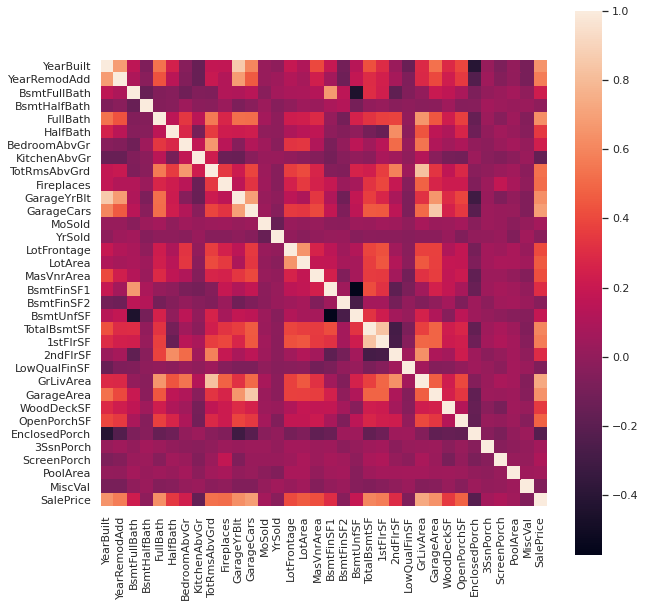

In [25]:
# Compute pairwise correlation of numeric variables
corr_matrix = df[discrete_vars + continuous_vars].corr(method='spearman')

# Display correlation matrix
plt.figure(figsize=[10,10])
sns.heatmap(corr_matrix, square=True);

Display features starting with the one with the highest correlation to house price to the least in a bar chart

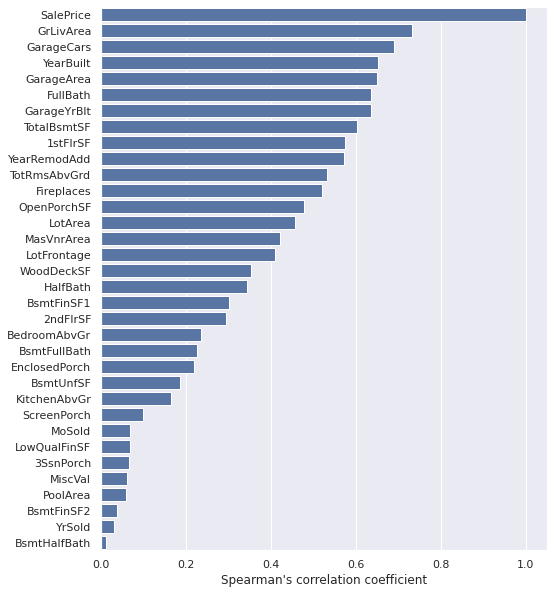

In [26]:
# Compute absolute value of correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Arrange numeric variables from having the highest correlation to house price to having the least
corr_list = abs_corr_matrix.unstack()['SalePrice'].sort_values(kind="quicksort", ascending=False)

# Display correlations in a bar chart
plt.figure(figsize=[8,10]);
sns.barplot(y=corr_list.index, x=corr_list, color=default_color);
plt.xlabel("Spearman's correlation coefficient");

***Finding(s)***
> Based on the heatmap (correlation matrix) above, the findings are:
- There is a strong positive correlation between YearBuilt and GarageYrBuilt, which shows that most of garages were built in either the same year as or the year after the house was built.
- There is a strong positive correlation between TotRmsAbvGrd (total rooms) and GrLivArea, which indicates that there are more rooms when the living area is large.
- There is a strong positive correlation between GarageCars (size of garage in car capacity) and GarageArea, which is expected as they encodes similar information.
- There is a strong positive correlation between TotalBsmtSF and 1stFlrSF, which is likely to happen by coincidence because these variables do not seem to be related.

> Based on the bar chart, the findings are:
- The features with Spearman's correlation coefficient exceeding 0.6 are GrLivArea, GarageCars, YearBuilt, GarageArea, FullBath and GarageYrBlt (in decreasing order)
- Among all the numeric variables, the correlation between GrLivArea and SalePrice is the highest, which is not suprising to find out. This means house with larger living area is very likely to have higher sale price.
- Both GarageCars and GarageArea have moderately high correlation coefficient because there is a strong positive correlation between GarageCars and GarageArea. This means house with larger garage area is likely to have higher sale price.
- YearBuilt and GarageYrBlt have moderately high correlation correlation because there is a strong positive correlation between GarageCars and GarageArea. This suggests that houses or garages that were built more recently have higher sale prices due to depreciation.
- There is a moderate correlation between FullBath and SalePrice, which implies house with more full bathrooms is likely to have higher sale price.
- Features that have almost no correlation with SalePrice (coefficient < 0.1) are ScreenPorch, MoSold, LowQualFinSF, 3SsnPorch, MiscVal, PoolArea, BsmtFinSF2, YrSold and BsmtHalfBath.

The second method of analysing relationships between numeric variables with house price is to generate scatter plots in order to visualize the relationships and detect outliers in the data.

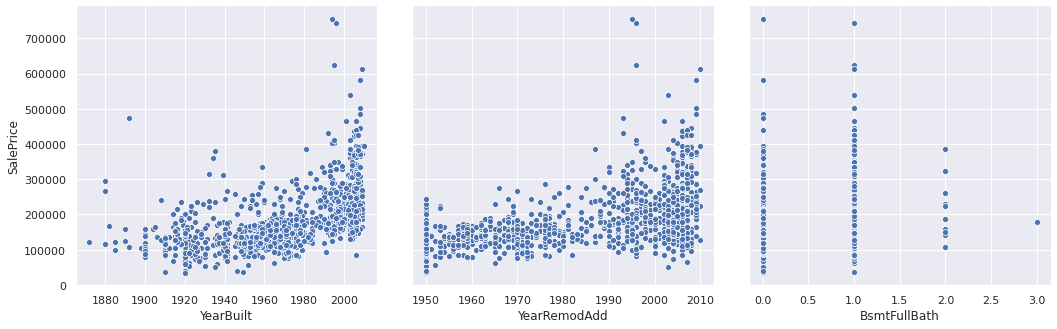

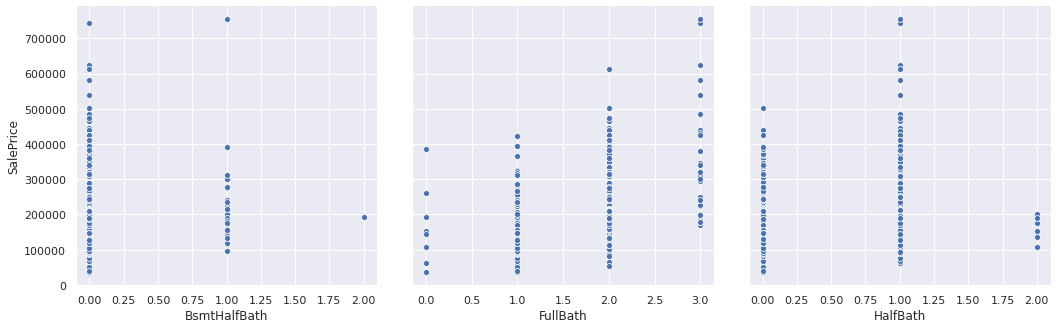

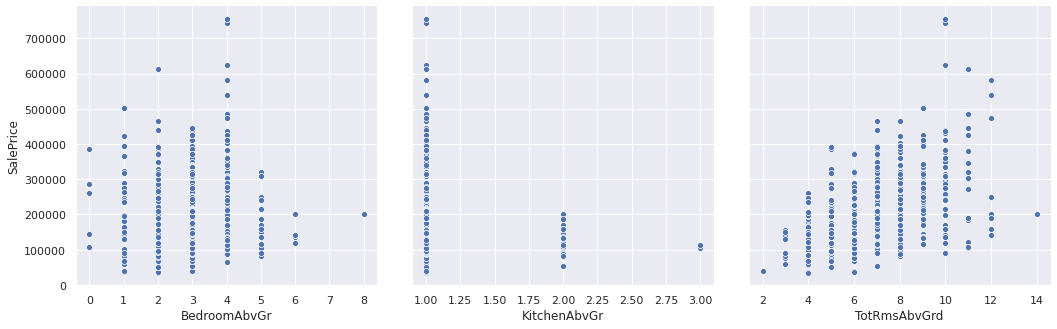

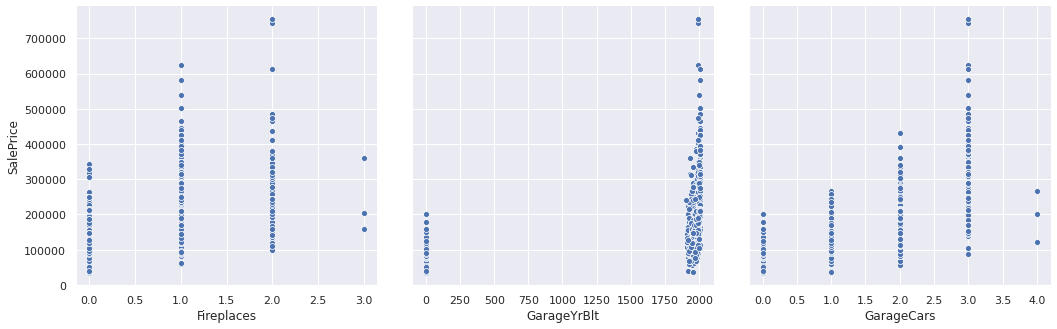

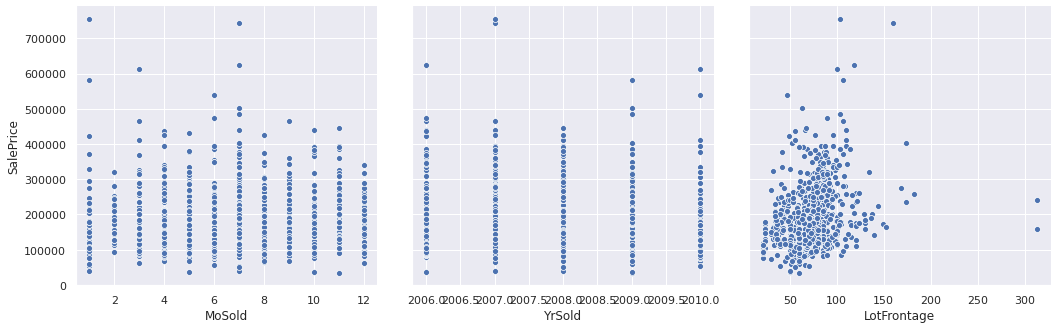

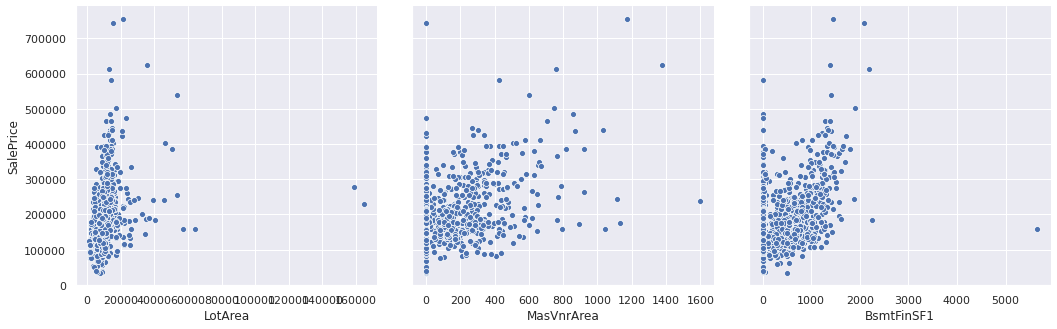

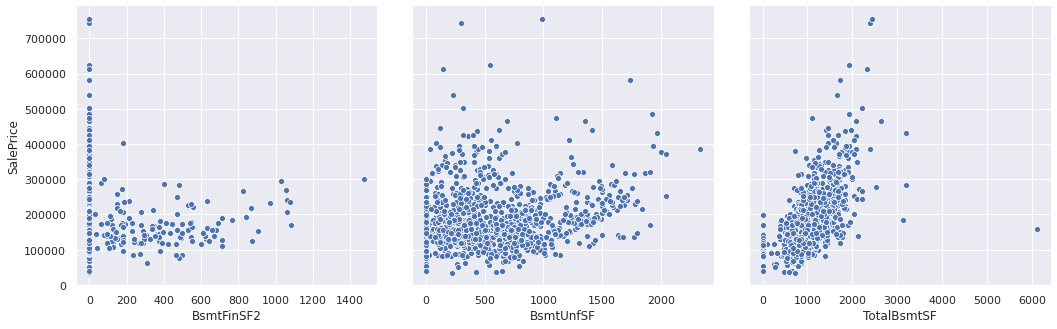

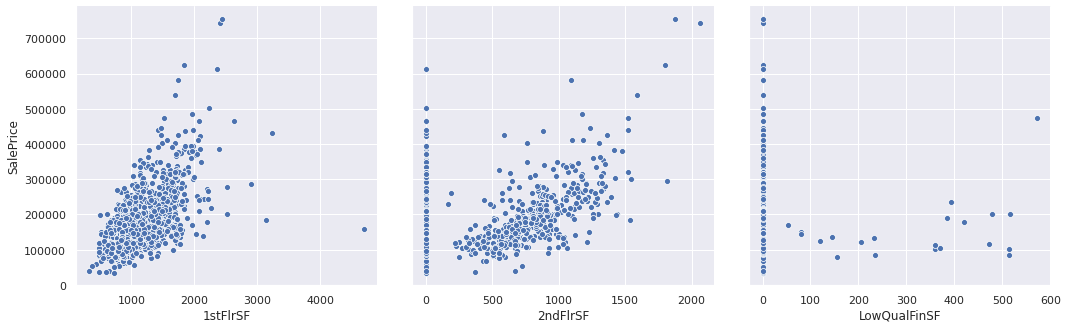

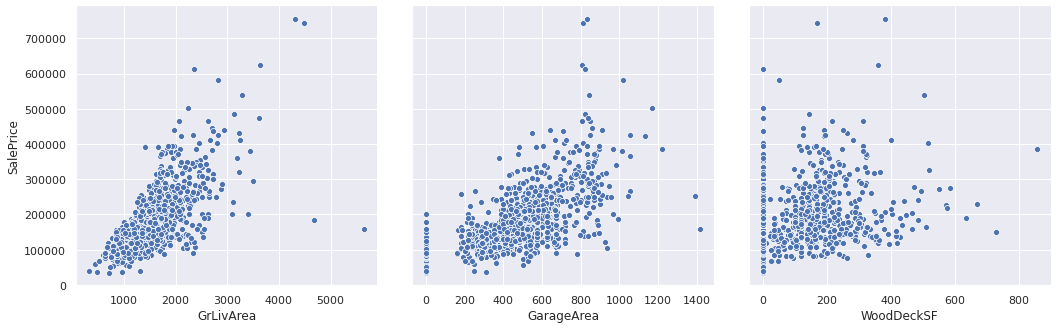

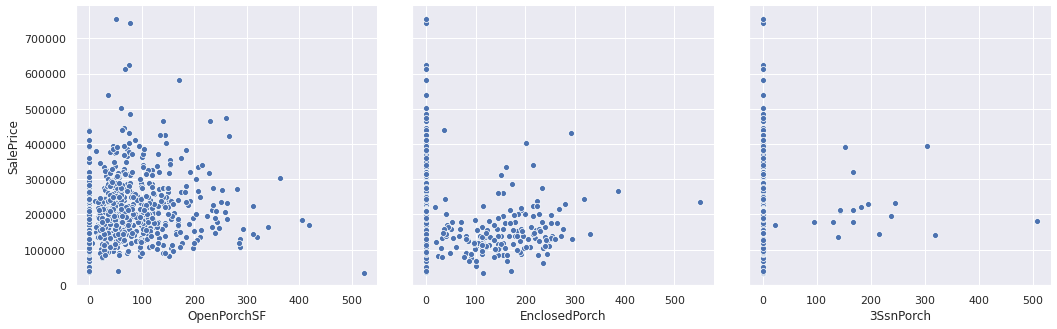

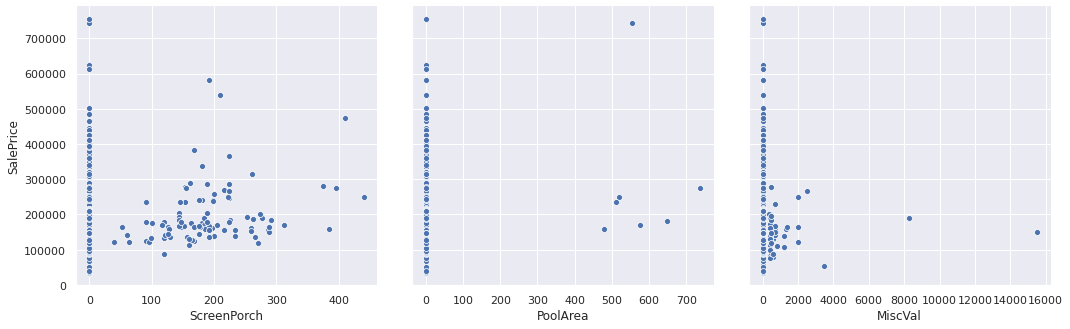

In [27]:
# Sample 80% of data so that scatter plots are clearer and rendered faster
df_samples = df.sample(frac=.8, random_state=1)

# Generate scatter plot of each variable against SalePrice
col_width = 3 # number of plots for each row
numeric_variables = discrete_vars + continuous_vars
numeric_variables.remove('SalePrice')

for i in range(math.ceil(len(numeric_variables)/col_width)):
    g=sns.pairplot(df_samples, x_vars=numeric_variables[i*col_width:i*col_width+col_width], y_vars=['SalePrice']);
    g.fig.set_size_inches(15,5);

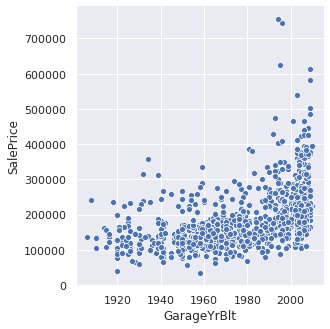

In [28]:
# Have a closer look at non-zero GarageYrBlt
df_samples['GarageYrBlt'] = df_samples['GarageYrBlt'].replace(0, np.nan)
g = sns.pairplot(df_samples, x_vars=['GarageYrBlt'], y_vars=['SalePrice'], dropna=True);
g.fig.set_size_inches(5,5);

***Finding(s)***
> Based on all the scatter plots above, the findings are:
- Only a handful houses have non-zero ScreenPorch and BsmtFinSF2, and there are even fewer houses that have non-zero 3SsnPorch, PoolArea, LowQualFinSF and MiscVal. This explains their low Spearman correlations with SalePrice. Thus, it is worth trying to drop these features when training a machine learning model in a bid to improve the performance of the model or reduce the complexity of model.
- YrSold and MoSold do not have a significant correlation with SalePrice. For YrSold, it could be because all the houses are sold around the same time, which was between 2006 to 2010. For MoSold, it is not suprising to find out that it has little to no influence on house price. Thus, it is also worth trying to drop these features for the same reason as stated in the previous point.
- Features that have strong correlation with SalePrice are LotArea, BsmtFinSF, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea. All of these variables are related to space. Thus, it is not suprising that these features are highly correlated with SalePrice.
- There are outliers in features that are detected in univariate analysis as well as some other features.
    - LotArea - values are greater than 120000 but SalePrice is less than 300000
    - BsmtFinSF1 - values are greater than 3000 but SalePrice is less than 200000
    - TotalBsmtSF - values are greater than 4000 but SalePrice is less than 200000
    - 1stFlrSF - values are greater than 4000 but SalePrice is less than 200000
    - GrLivArea - values are greater than 4000 but SalePrice is less than 200000
- There are some data that seems like outliers. For example, the data with OpenPorchSF larger than 500 but SalePrice less than 1000000. However, these data will not be considered as outliers due to uncertainty.

### Relationships between categorical variables and SalePrice

The next step of bivarate analysis is to visualize the relationships between categorical variables with house price with boxplots.

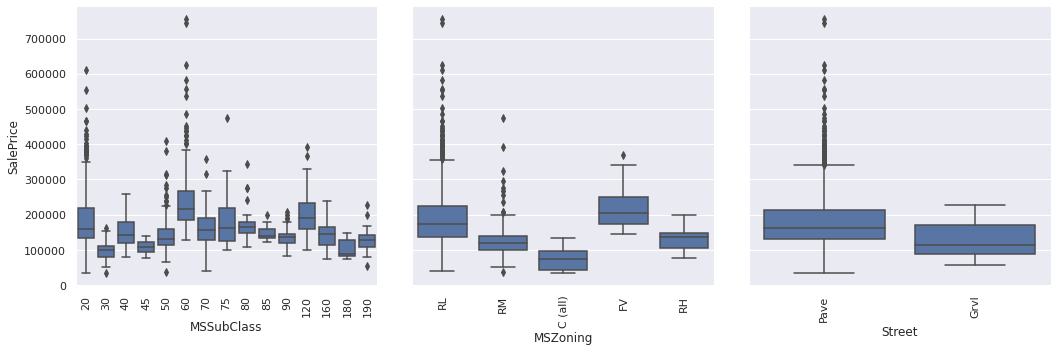

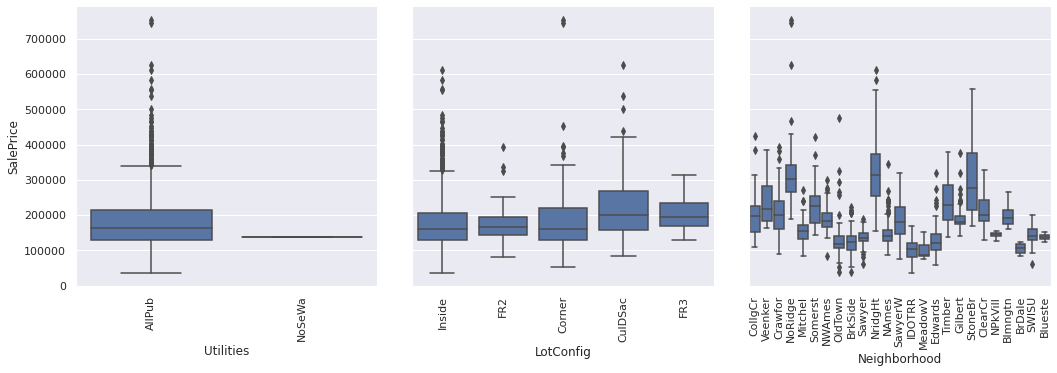

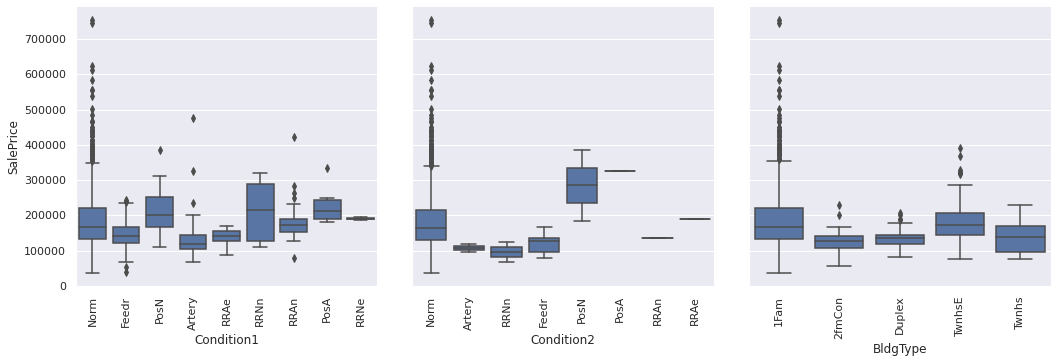

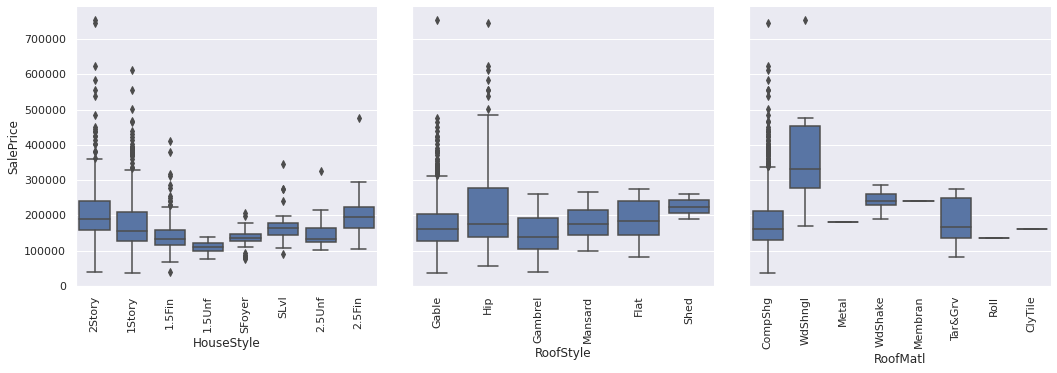

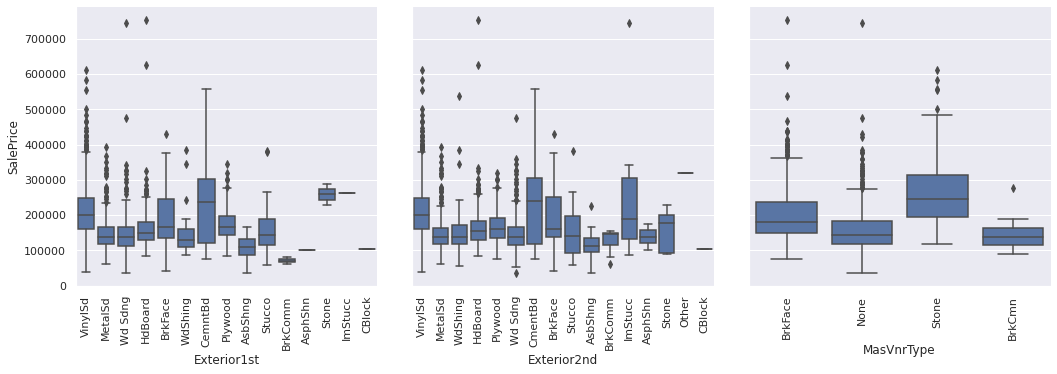

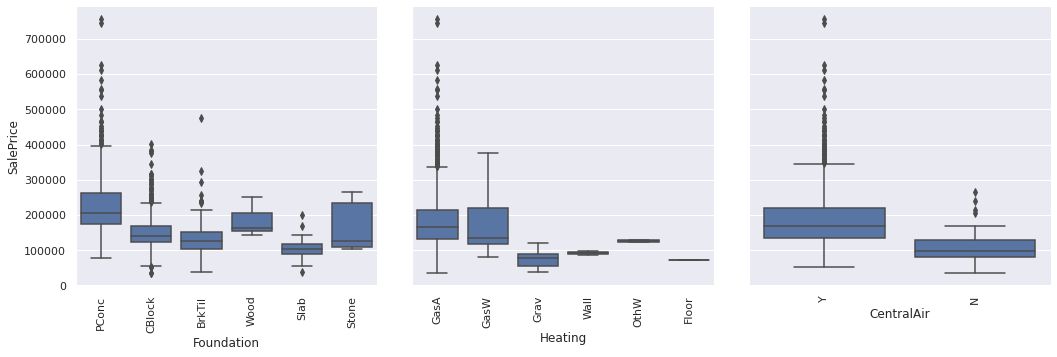

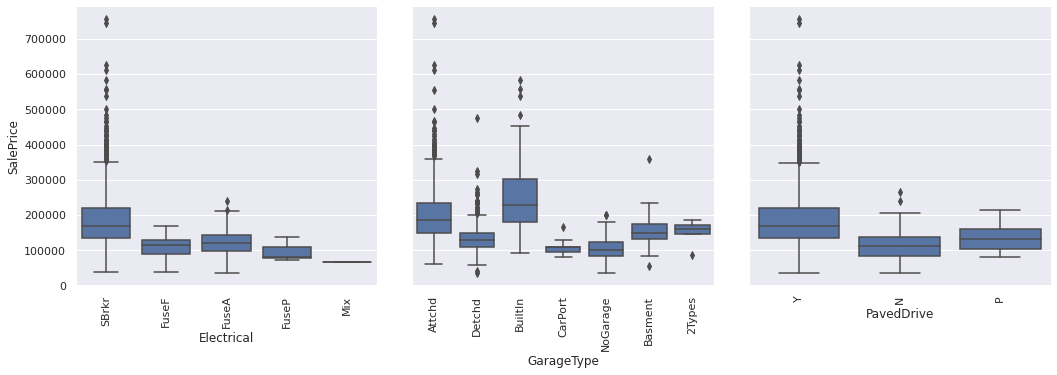

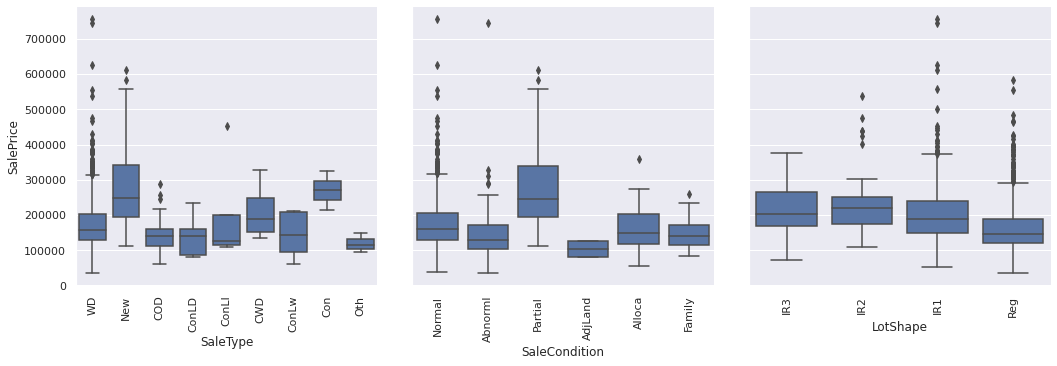

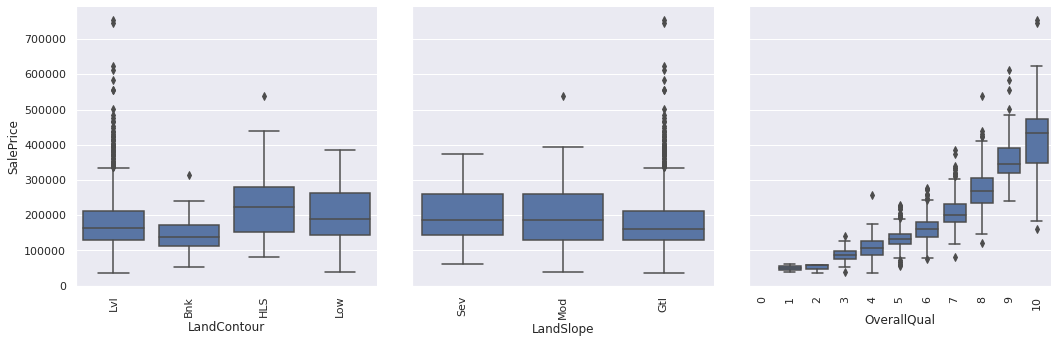

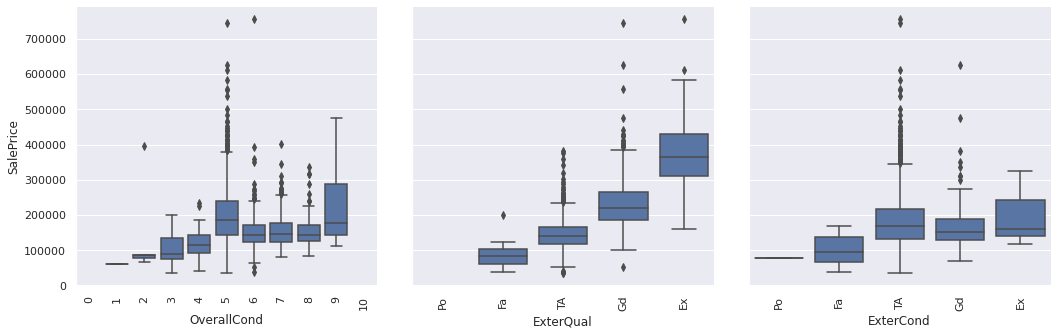

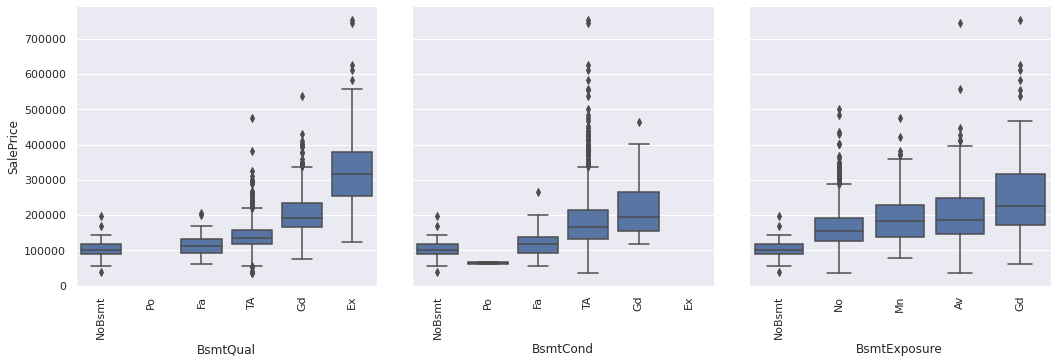

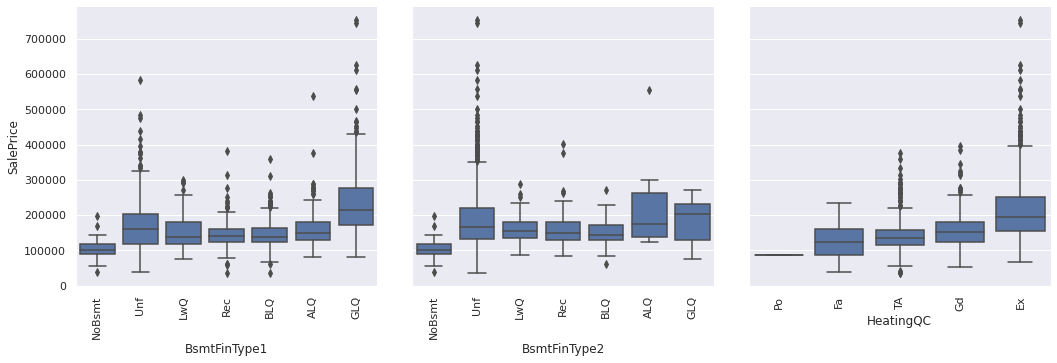

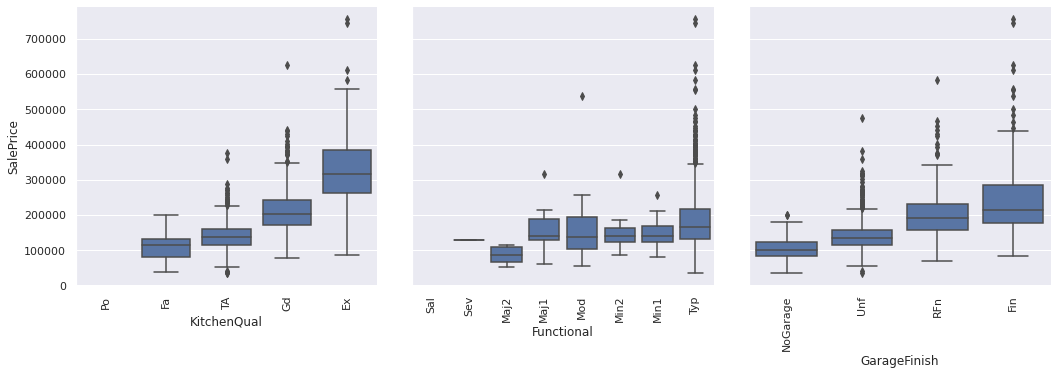

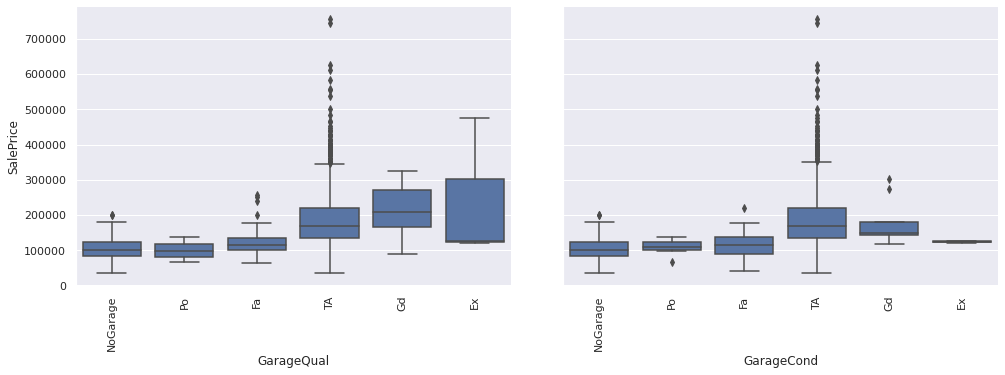

In [29]:
# Generate box plot of each categorical variable against SalePrice
col_width = 3 # number of plots for each row
cat_variables = nominal_vars + ordinal_vars

def boxgrid(x, y, **kwargs):
    """ Function for creating box plot with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90)

for i in range(math.ceil(len(cat_variables)/col_width)):
    g=sns.PairGrid(df, x_vars=cat_variables[i*col_width:i*col_width+col_width], y_vars=['SalePrice']);
    g.map(boxgrid)
    g.fig.set_size_inches(15,5);

In univariate analysis, it was hypothesized that Utilities, ExterCond, BsmtCond, GarageQual, GarageCond and Functional have little to no influence on the house price due to low entropy. These hypotheses will be verified using the box plots above.

***Finding(s)***
> Based on all the box plots above, the findings are:
- Entropy of Utilities is low.  Thus, it is worth trying to drop Utilities when training a machine learning model in a bid to improve the performance of the model or lower complexity of the model.
- Based on the overall trend shown in the box plot of GarageCond, GarageCond seems to have a small influence on SalePrice. Houses with poor (Po) and fair (Fa) garage or without garage tend to have lower SalePrice than houses with average (TA), good (Gd) and excellent (Ex) garage. Similar overall trends are also observed for GarageQual, ExterCond, BsmtCond and Functional from their corresponding box plots. Thus, the hypotheses that are made with reference to these variables in univariate analysis are not entirely correct.
- OverallQual seems to have the most impact on SalePrice. Besides that, SalePrice is also greatly influenced by other features that are related to quality and condition, such as OverallCond, ExterCond, ExterQual and etc. SalePrice increases as the quality and condition increases.
- MSZoning, Neighborhood, MasVnrType, Foundation, BsmtExposure, HeatingQC and GarageFinish seem to have substantial influence on SalePirce based on their box plots.

### Bivariate Analysis Summary <a class="anchor" id="#bi-analysis-summary"></a>

Based on all the bivariate plots, the important findings are:
- There is a strong positive correlation between YearBuilt and GarageYrBuilt, TotRmsAbvGrd and GrLivArea, GarageCars and GarageArea as well as TotalBsmtSF, 1stFlrSF. Thus, it is worth trying to remove one of them before training a machine learning model in a bid to reduce the complexity of the model. YearBuilt, GrLivArea, GarageArea and 1stFlrSF will be chosen over GarageYrBuilt, TotRmsAbvGrd, GarageCars and TotalBsmtSF respectively. This is because some of houses do not have garage (GarageYrBuilt) and basement (TotalBsmtSF), and GarageArea provides more information than GarageCars. Besides that, 1stFlrSF is more correlated with SalePrice as compared to TotRmsAbvGrd with SalePrice.
- The features with Spearman's correlation coefficient exceeding 0.6 are GrLivArea, GarageCars, YearBuilt, GarageArea, FullBath and GarageYrBlt (in decreasing order).
- Features that have almost no correlation with SalePrice (coefficient < 0.1) are ScreenPorch, MoSold, LowQualFinSF, 3SsnPorch, MiscVal, PoolArea, BsmtFinSF2, YrSold and BsmtHalfBath. Only a handful houses have non-zero ScreenPorch and BsmtFinSF2, and there are even fewer houses that have non-zero 3SsnPorch, PoolArea, LowQualFinSF and MiscVal. YrSold and MoSold do not have a significant correlation with SalePrice. Thus, it is worth trying to drop these features when training a machine learning model in a bid to improve the performance of the model or reduce the complexity of model.
- There are outliers in some features
    - LotArea - values are greater than 120000 but SalePrice is less than 300000
    - BsmtFinSF1 - values are greater than 3000 but SalePrice is less than 200000
    - TotalBsmtSF - values are greater than 4000 but SalePrice is less than 200000
    - 1stFlrSF - values are greater than 4000 but SalePrice is less than 200000
    - GrLivArea - values are greater than 4000 but SalePrice is less than 200000
- Entropy of Utilities is low.  Thus, it is worth trying to drop Utilities when training a machine learning model in a bid to improve the performance of the model or lower complexity of the model.
- OverallQual seems to have the most impact on SalePrice. Besides that, SalePrice is also greatly influenced by other features that are related to quality and condition, such as OverallCond, ExterCond, ExterQual and etc. SalePrice increases as the quality and condition increases.
- MSZoning, Neighborhood, MasVnrType, Foundation, BsmtExposure, HeatingQC and GarageFinish seem to have substantial influence on SalePirce based on their box plots.
    
## EDA Summary <a class="anchor" id="#eda-summary"></a>

As the distribution of house price (SalePrice) is right-skewed, SalePrice must be transformed before using it to train a machine learning model. The outliers, which were detected in univariate and bivariate analysis, in the data must be removed. Furthermore, it is worth trying to drop some features before training a machine learning model in a bid to improve the performance of the model or reduce the complexity of model. Features that can be dropped because of their high correlation with another feature are GarageYrBuilt, TotRmsAbvGrd, GarageCars and TotalBsmtSF. Whereas, features that can be dropped because of their low correlation with SalePrice are ScreenPorch, MoSold, LowQualFinSF, 3SsnPorch, MiscVal, PoolArea, BsmtFinSF2, YrSold, BsmtHalfBath and Utilities.

## Data Cleaning <a class="anchor" id="#data-cleaning"></a>

In this section, outliers, which were detected in univariate and bivariate analysis, will be dropped.

- There are outliers in some features
    - LotArea - values are greater than 120000 but SalePrice is less than 300000
    - BsmtFinSF1 - values are greater than 3000 but SalePrice is less than 200000
    - TotalBsmtSF - values are greater than 4000 but SalePrice is less than 200000
    - 1stFlrSF - values are greater than 4000 but SalePrice is less than 200000
    - GrLivArea - values are greater than 4000 but SalePrice is less than 200000

In [30]:
# Create a copy of the data frame
df_clean = df.copy()

In [31]:
# Remove row with LotArea greater than 1200000 but SalePrice less than 300000
df_clean.drop(df_clean[(df_clean['LotArea'] > 120000) & (df_clean['SalePrice'] < 300000)].index, inplace=True)

# Test if cleaning is carried out successfully
df_clean[(df_clean['LotArea'] > 120000) & (df_clean['SalePrice'] < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [32]:
# Remove row with BsmtFinSF1 greater than 3000 but SalePrice less than 200000
df_clean.drop(df_clean[(df_clean['BsmtFinSF1'] > 3000) & (df_clean['SalePrice'] < 200000)].index, inplace=True)

# Test if cleaning is carried out successfully
df_clean[(df_clean['BsmtFinSF1'] > 3000) & (df_clean['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [33]:
# Remove row with TotalBsmtSF greater than 4000 but SalePrice less than 200000
df_clean.drop(df_clean[(df_clean['TotalBsmtSF'] > 4000) & (df_clean['SalePrice'] < 200000)].index, inplace=True)

# Test if cleaning is carried out successfully
df_clean[(df_clean['TotalBsmtSF'] > 4000) & (df_clean['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [34]:
# Remove row with 1stFlrSF greater than 4000 but SalePrice less than 200000
df_clean.drop(df_clean[(df_clean['1stFlrSF'] > 4000) & (df_clean['SalePrice'] < 200000)].index, inplace=True)

# Test if cleaning is carried out successfully
df_clean[(df_clean['1stFlrSF'] > 4000) & (df_clean['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [35]:
# Remove row with GrLivArea greater than 4000 but SalePrice less than 200000
df_clean.drop(df_clean[(df_clean['GrLivArea'] > 4000) & (df_clean['SalePrice'] < 200000)].index, inplace=True)

# Test if cleaning is carried out successfully
df_clean[(df_clean['GrLivArea'] > 4000) & (df_clean['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [36]:
print("Number of rows before cleaning: {}".format(len(df)))
print("Number of rows after cleaning: {}".format(len(df_clean)))

Number of rows before cleaning: 1460
Number of rows after cleaning: 1456


A total of 4 outliers are removed from the training set.

## Saving <a class="anchor" id="saving"></a>

After data cleaning is completed, the data frame is saved to a CSV file

In [37]:
# Save cleaned dataframe to a CSV file
df_clean.to_csv('train_clean_EDA.csv', index=False)